## Import Modules

In [7]:
# !pip install yfinance statsmodels -q

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [12]:
ticker = 'GME'
df = yf.download(ticker, start='2020-03-01', end='2025-03-01', interval='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GME,GME,GME,GME,GME
Date,,,,,
2020-03-02,0.9575,0.9625,0.8475,0.9000,12833600
2020-03-03,0.9075,0.9725,0.8750,0.9700,17130000
2020-03-04,0.9425,0.9575,0.8650,0.9275,17030400
2020-03-05,0.9900,0.9975,0.8975,0.9250,14397600
2020-03-06,0.9800,1.0175,0.9400,0.9600,8387200


In [13]:
df = df[['Close']]
df = df.rename(columns={'Close': 'value'})
df.index.name = 'Date'
df.head()

Price,value
Ticker,GME
Date,
2020-03-02,0.9575
2020-03-03,0.9075
2020-03-04,0.9425
2020-03-05,0.9900
2020-03-06,0.9800


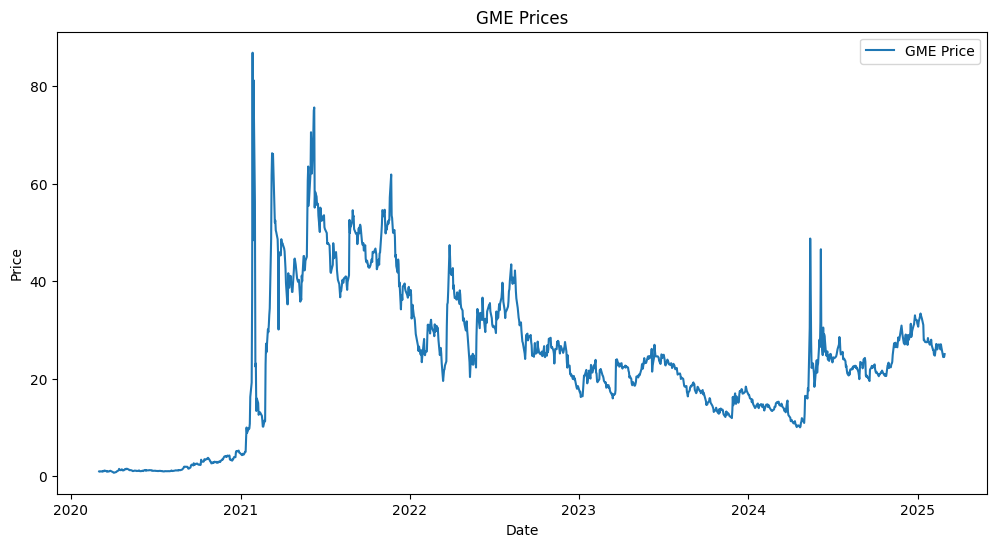

In [14]:
# plot the stock prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='GME Price')
plt.title('GME Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Anomaly Detection

### Calculate Z-Score

In [28]:
df['Z-Score'] = zscore(df['value'])

# define threshold for anomaly
threshold = 2.5
df['Anomaly Z-Score'] = df['Z-Score'].abs() > threshold

### Isolation Forest

In [16]:
X = df[['value']].values

# initialize and fit isolation forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly Isolation Forest'] = isolation_forest.fit_predict(X) == -1

### Residuals

In [30]:
# decompose the time series
decomposition = seasonal_decompose(df['value'], model='additive', period=30)
df['Residuals'] = decomposition.resid

# residual threshold
residual_threshold = 15
df['Anomaly Residual'] = df['Residuals'].abs() > residual_threshold

In [18]:
df.head()

Price,value,Z-Score,Anomaly Z-Score,Anomaly Isolation Forest,Residuals,Anomaly Residual
Ticker,GME,,,,,
Date,,,,,,
2020-03-02,0.9575,-1.515425,False,False,NaN,False
2020-03-03,0.9075,-1.518773,False,False,NaN,False
2020-03-04,0.9425,-1.516429,False,False,NaN,False
2020-03-05,0.9900,-1.513249,False,False,NaN,False
2020-03-06,0.9800,-1.513919,False,False,NaN,False


## Plot Anomalies

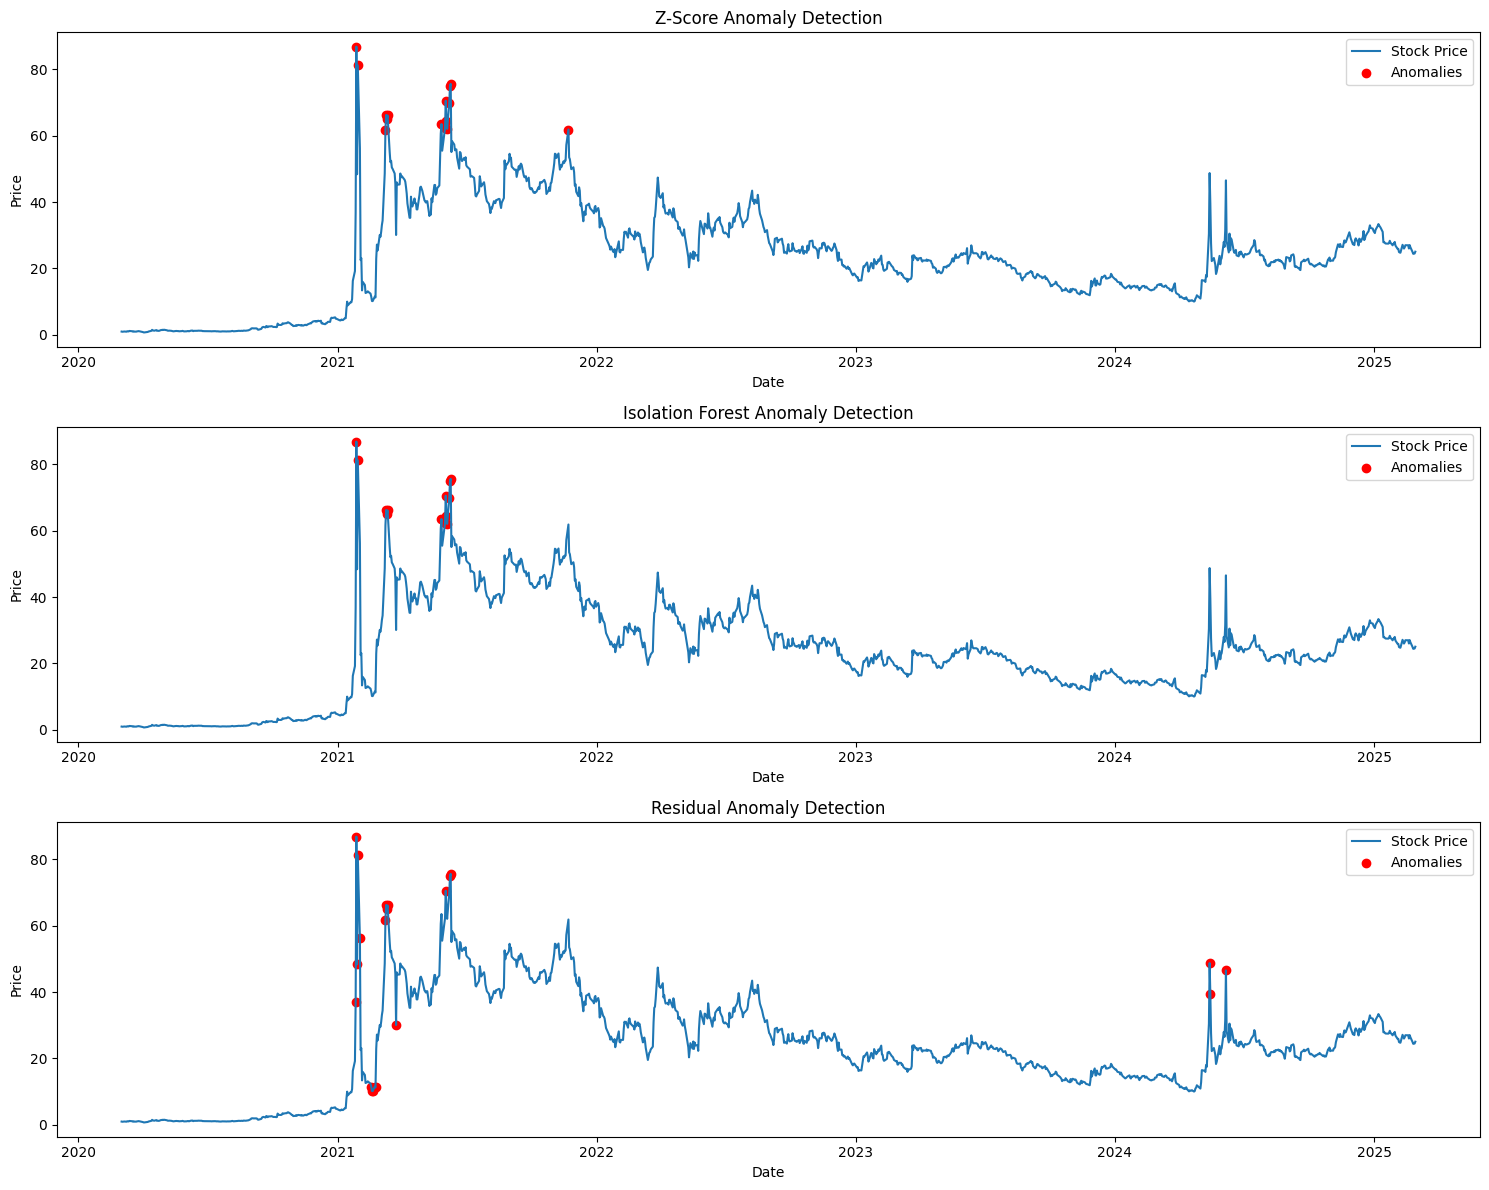

In [31]:
plt.figure(figsize=(15, 12))

# plotting z-score anomalies
plt.subplot(3, 1, 1)
plt.plot(df.index, df['value'], label='Stock Price')
plt.scatter(df.index[df['Anomaly Z-Score']], df['value'][df['Anomaly Z-Score']], color='red', label='Anomalies')
plt.title('Z-Score Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# plotting isolation forest anomalies
plt.subplot(3, 1, 2)
plt.plot(df.index, df['value'], label='Stock Price')
plt.scatter(df.index[df['Anomaly Isolation Forest']], df['value'][df['Anomaly Isolation Forest']], color='red', label='Anomalies')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# plotting residual anomalies
plt.subplot(3, 1, 3)
plt.plot(df.index, df['value'], label='Stock Price')
plt.scatter(df.index[df['Anomaly Residual']], df['value'][df['Anomaly Residual']], color='red', label='Anomalies')
plt.title('Residual Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()